In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df_pathway_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
# 
df_pathway_att = df_pathway_att[df_pathway_att['cell_line'].isin(['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)
df_pathway_att.head()

(2560, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,5-Fluorouracil,HCC827,LUAD,0.001369,0.001426,0.001540,0.002264,0.001739,0.001743,0.001756,...,0.001509,0.001329,0.001365,0.001443,0.001413,0.001735,0.002677,0.001404,0.002237,0.001536
1,5-azacytidine,HCC827,LUAD,0.001556,0.001327,0.001549,0.002153,0.001751,0.001593,0.001424,...,0.001550,0.001314,0.001348,0.001411,0.001411,0.001747,0.002680,0.001549,0.002575,0.001526
2,A-366,HCC827,LUAD,0.001391,0.001622,0.001523,0.001685,0.001708,0.001727,0.001567,...,0.001524,0.001405,0.001509,0.001394,0.001567,0.001561,0.002652,0.001285,0.002561,0.001581
3,ABT737,HCC827,LUAD,0.001371,0.001472,0.001551,0.001253,0.001746,0.001757,0.001596,...,0.001371,0.001404,0.001544,0.001479,0.001595,0.001588,0.002382,0.001216,0.002352,0.001505
4,AGI-5198,HCC827,LUAD,0.001361,0.001451,0.001533,0.001655,0.001740,0.001577,0.001578,...,0.001534,0.001364,0.001502,0.001404,0.001403,0.001734,0.002483,0.001392,0.002451,0.001517


In [77]:
# 根据drug进行分组计数
df_pathway_att.groupby('drug')['cell_line'].count()

drug
5-Fluorouracil       12
5-azacytidine        10
A-366                10
ABT737               12
AGI-5198             12
                     ..
YK-4-279             12
ZM447439             12
Zoledronate          11
alpha-lipoic acid    11
glutathione          11
Name: cell_line, Length: 233, dtype: int64

In [78]:

# 筛选出drug  = ABT737,Oxaliplatin,BMS-754807,Nutlin-3a (-),Axitinib,Navitoclax,PCI-34051,Picolinici-acid,Docetaxel,Camptothecin
df_pathway_att_top10_drug = df_pathway_att[df_pathway_att['drug'].isin(['Oxaliplatin','ABT737','BMS-754807','Nutlin-3a (-)','Axitinib','Navitoclax','Camptothecin'])]
# 重置索引
df_pathway_att_top10_drug = df_pathway_att_top10_drug.reset_index(drop=True)
print(df_pathway_att_top10_drug.shape)
df_pathway_att_top10_drug.head()

(84, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,ABT737,HCC827,LUAD,0.001371,0.001472,0.001551,0.001253,0.001746,0.001757,0.001596,...,0.001371,0.001404,0.001544,0.001479,0.001595,0.001588,0.002382,0.001216,0.002352,0.001505
1,Axitinib,HCC827,LUAD,0.001358,0.001642,0.001533,0.001674,0.001564,0.001565,0.001576,...,0.001533,0.001209,0.001505,0.001576,0.001402,0.001731,0.002398,0.001232,0.002556,0.001546
2,BMS-754807,HCC827,LUAD,0.001362,0.001431,0.001534,0.001764,0.001741,0.001578,0.001579,...,0.001534,0.001386,0.001510,0.001405,0.001546,0.001734,0.002488,0.001385,0.002450,0.001515
3,Camptothecin,HCC827,LUAD,0.001358,0.001629,0.001532,0.001345,0.001681,0.001708,0.001578,...,0.001533,0.001379,0.001506,0.001416,0.001403,0.001562,0.002675,0.001415,0.002566,0.001509
4,Navitoclax,HCC827,LUAD,0.001368,0.001473,0.001547,0.001394,0.001599,0.001666,0.001593,...,0.001547,0.001442,0.001545,0.001413,0.001591,0.001413,0.002386,0.001265,0.002323,0.001412


In [79]:
# 取df_pathway_att_top10_drug前三列数据
df_pathway_att_top10_drug_OncotreeCode = df_pathway_att_top10_drug.iloc[:, :3]
# 去重
df_pathway_att_top10_drug_OncotreeCode = df_pathway_att_top10_drug_OncotreeCode.drop_duplicates()
# 重置索引
df_pathway_att_top10_drug_OncotreeCode = df_pathway_att_top10_drug_OncotreeCode.reset_index(drop=True)
print(df_pathway_att_top10_drug_OncotreeCode.shape)
df_pathway_att_top10_drug_OncotreeCode.head()

(84, 3)


,drug,cell_line,OncotreeCode
0,ABT737,HCC827,LUAD
1,Axitinib,HCC827,LUAD
2,BMS-754807,HCC827,LUAD
3,Camptothecin,HCC827,LUAD
4,Navitoclax,HCC827,LUAD


In [80]:
# 对df_pathway_att_top10_drug从第四列数据开始进行PCA降维，降维成2维数据
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_pathway_att_top10_drug.iloc[:, 3:])
df_pathway_att_top10_drug_pca = pca.transform(df_pathway_att_top10_drug.iloc[:, 3:])
df_pathway_att_top10_drug_pca.shape

(84, 2)

In [81]:
# 将降维后的数据转换成dataframe
df_pathway_att_top10_drug_pca = pd.DataFrame(df_pathway_att_top10_drug_pca)
df_pathway_att_top10_drug_pca.columns = ['pca_1', 'pca_2']
df_pathway_att_top10_drug_pca.insert(0, 'drug', df_pathway_att_top10_drug['drug'])
df_pathway_att_top10_drug_pca.insert(1, 'OncotreeCode', df_pathway_att_top10_drug['OncotreeCode'])
print(df_pathway_att_top10_drug_pca.shape)
df_pathway_att_top10_drug_pca.head()

(84, 4)


,drug,OncotreeCode,pca_1,pca_2
0,ABT737,LUAD,0.003636,0.000169
1,Axitinib,LUAD,-0.001601,-0.000039
2,BMS-754807,LUAD,-0.001153,0.000498
3,Camptothecin,LUAD,-0.001809,-0.000219
4,Navitoclax,LUAD,0.003853,-0.000338


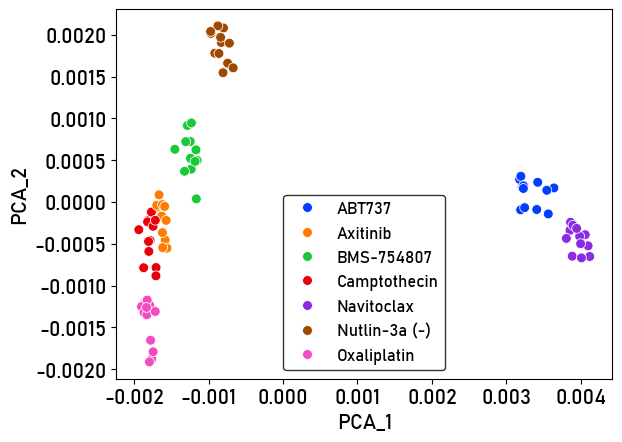

In [83]:
# 使用seaborn画图
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
# plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='drug', data=df_pathway_att_top10_drug_pca, s=50,palette='bright')
# 设置标签居中
plt.legend(scatterpoints=1, frameon=True, labelspacing=0.5, loc='best', fontsize=12,edgecolor='black')


# title
# plt.title('Pathway Attention Visualization On All Cell Lines of different drugs', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

plt.savefig('7_drug_pathway_attention_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

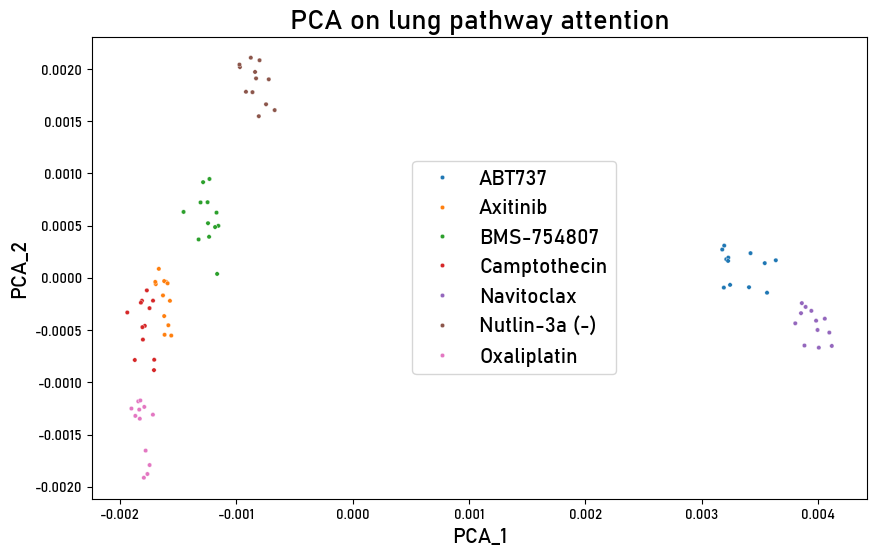

In [23]:
# 使用seaborn画图
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='drug', data=df_pathway_att_top10_drug_pca, s=10)
# title
plt.title('PCA on lung pathway attention', fontsize=20)
# 设置标签居中
plt.legend(loc='center left', bbox_to_anchor=(0.4, 0.5), ncol=1, fontsize=15)
# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_top10_drug_seaborn.png', dpi=300, bbox_inches='tight')

plt.show()


## 探究SMILES Attention 与 细胞系（特征）的关系

In [57]:
df_smiles_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_smiles_attentions_gep.csv')
# lung_cell_lines = ['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1']
# lung_cell_lines = ['HCC827','PC14','NCIH526','LU135']
# df_smiles_att = df_smiles_att[df_smiles_att['cell_line'].isin(lung_cell_lines)]
lung_drugs = ['Oxaliplatin','ABT737','BMS-754807','Nutlin-3a (-)','Axitinib','Navitoclax','Camptothecin']
df_smiles_att = df_smiles_att[df_smiles_att['drug'].isin(lung_drugs)]
# 重置索引
df_smiles_att = df_smiles_att.reset_index(drop=True)
print(df_smiles_att.shape)
df_smiles_att.head()

(426, 259)


,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,ABT737,PCM,OPM2,0.001874,0.002511,0.002220,0.004436,0.003700,0.004466,0.001332,...,0.005321,0.005187,0.006720,0.006663,0.007908,0.006287,0.005171,0.004562,0.009057,0.006331
1,Axitinib,PCM,OPM2,0.002087,0.002754,0.002440,0.004644,0.003943,0.004688,0.001524,...,0.016030,0.020563,0.010714,0.006000,0.007844,0.005590,0.007003,0.004909,0.004281,0.005671
2,BMS-754807,PCM,OPM2,0.002006,0.002658,0.002354,0.004566,0.003849,0.004602,0.001448,...,0.006112,0.006427,0.007040,0.007035,0.006748,0.014737,0.017161,0.009678,0.005687,0.007462
3,Camptothecin,PCM,OPM2,0.002104,0.002789,0.002473,0.004676,0.003981,0.004720,0.001554,...,0.014179,0.007608,0.008003,0.004626,0.013730,0.006022,0.005707,0.004634,0.003762,0.005037
4,Navitoclax,PCM,OPM2,0.001815,0.002437,0.002155,0.004374,0.003628,0.004399,0.001274,...,0.007988,0.011010,0.006805,0.006005,0.010388,0.006367,0.010587,0.006393,0.004399,0.003969


In [58]:
# 对df_smiles_att从第四列数据开始进行PCA降维，降维成2维数据
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_smiles_att.iloc[:, 3:])
df_smiles_att_pca = pca.transform(df_smiles_att.iloc[:, 3:])
df_smiles_att_pca.shape

(426, 2)

In [59]:
# 将降维后的数据转换成dataframe
df_smiles_att_pca = pd.DataFrame(df_smiles_att_pca)
df_smiles_att_pca.columns = ['pca_1', 'pca_2']
df_smiles_att_pca.insert(0, 'drug', df_smiles_att['drug'])
print(df_smiles_att_pca.shape)
df_smiles_att_pca.head()

(426, 3)


,drug,pca_1,pca_2
0,ABT737,-0.013766,0.006134
1,Axitinib,-0.000433,-0.008445
2,BMS-754807,-0.000099,-0.009870
3,Camptothecin,-0.001722,-0.010808
4,Navitoclax,-0.012231,0.004155


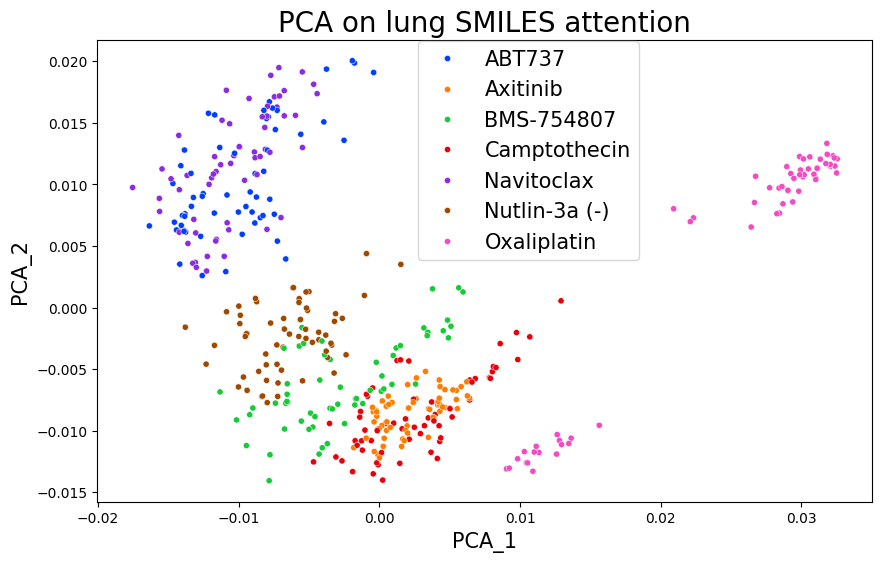

In [63]:
# 使用seaborn画图
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.style.use('default')
sns.scatterplot(x='pca_1', y='pca_2', hue='drug', data=df_smiles_att_pca, s=20,palette='bright')
# title
plt.title('PCA on lung SMILES attention', fontsize=20)
# 设置标签居中
plt.legend(loc='best', bbox_to_anchor=(0.4, 0.5), ncol=1, fontsize=15)
# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_smiles_attention_PCA_seaborn.png', dpi=300, bbox_inches='tight')

plt.show()